<a href="https://colab.research.google.com/github/Arju-Jawla/Mean-Sea-Level-Anomalies/blob/main/MSLA_06_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. INSTALLING REQUIRED LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error

## 2. UPLOADING DATASET

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project Learnings/Data/sla_ports_data.csv')

In [ ]:
df.head()

,Date,Vishakhapatnam,Kandla,Mumbai,Paradip,Cochin,time
0,1993-02-15,-0.10529,0.00740,0.046175,-0.188589,0.072789,0
1,1993-03-15,-0.10116,-0.01496,0.027392,-0.253900,0.071356,1
2,1993-04-15,-0.05141,-0.02428,0.028483,-0.151467,0.063489,2
3,1993-05-15,-0.04368,-0.00176,0.002800,-0.030378,0.004533,3
4,1993-06-15,-0.01149,0.01566,-0.011658,0.062744,-0.026656,4


### 2.1 Extract only Vishakhapatnam dat

In [ ]:
df_vsk = df[['Date', 'Vishakhapatnam']].copy()

In [ ]:
print(df_vsk)

           Date  Vishakhapatnam
0    1993-02-15        -0.10529
1    1993-03-15        -0.10116
2    1993-04-15        -0.05141
3    1993-05-15        -0.04368
4    1993-06-15        -0.01149
..          ...             ...
359  2023-01-15         0.14301
360  2023-02-15         0.00786
361  2023-03-15        -0.00794
362  2023-04-15        -0.03318
363  2023-05-15         0.04253

[364 rows x 2 columns]


## 3. Linear Regression Model with Lagged Values

### Step 1: Create Lagged Features

In [ ]:
# Define the number of lags. Let's use 3 months.
df_vsk['Lag_1'] = df_vsk['Vishakhapatnam'].shift(1)
df_vsk['Lag_2'] = df_vsk['Vishakhapatnam'].shift(2)
df_vsk['Lag_3'] = df_vsk['Vishakhapatnam'].shift(3)

In [ ]:
# Drop the rows with NaN values resulting from the lagging
df_vsk.dropna(inplace=True)

In [ ]:
df_vsk.shape

(361, 5)

### Step 2: Define train-test split (80-20)

In [ ]:
train_size = int(len(df_vsk) * 0.8)
train, test = df_vsk[:train_size], df_vsk[train_size:]

### Step 3: Train Linear Regression Model

In [ ]:
# Use the lagged columns as features and "Vishakhapatnam" as the target
X_train = train[['Lag_1', 'Lag_2', 'Lag_3']]
y_train = train['Vishakhapatnam']
X_test = test[['Lag_1', 'Lag_2', 'Lag_3']]
y_test = test['Vishakhapatnam']

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Step 4: Predict and Evaluate

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.005619736117286034


In [ ]:
results = test[['Date', 'Vishakhapatnam']].copy()
results['Predicted'] = y_pred
print(results.head())

           Date  Vishakhapatnam  Predicted
291  2017-05-15        -0.01836  -0.009363
292  2017-06-15         0.14099   0.023185
293  2017-07-15         0.01921   0.147480
294  2017-08-15         0.08223  -0.009741
295  2017-09-15         0.10950   0.076739


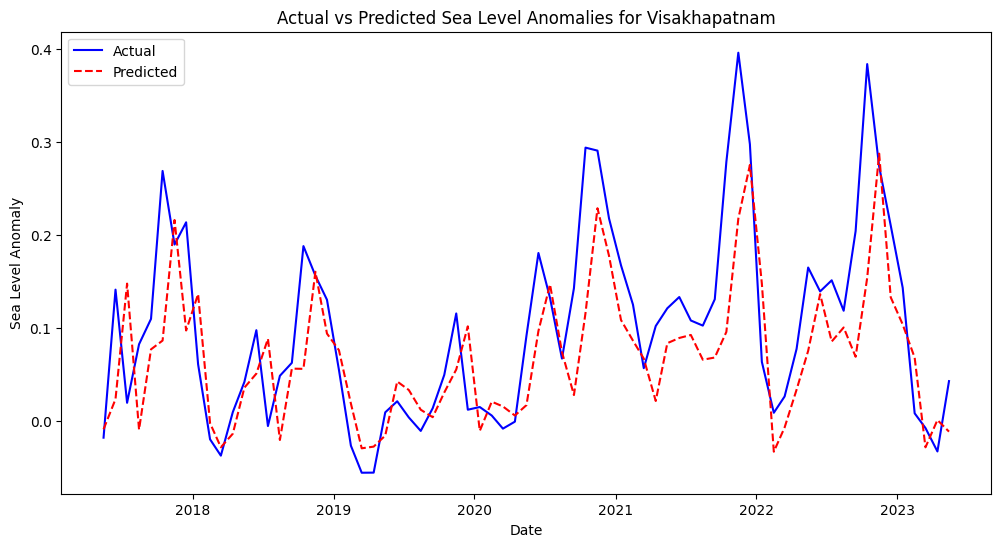

In [ ]:
# Assuming 'results' DataFrame contains the actual and predicted values
results.rename(columns={'Vishakhapatnam': 'Actual'}, inplace=True)  # Rename for clarity
results['Date'] = pd.to_datetime(results['Date'])  # Convert to datetime for plotting
results.set_index('Date', inplace=True)

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(results.index, results['Actual'], label='Actual', color='blue')
plt.plot(results.index, results['Predicted'], label='Predicted', color='red', linestyle='--')

# Add title and labels
plt.title('Actual vs Predicted Sea Level Anomalies for Visakhapatnam')
plt.xlabel('Date')
plt.ylabel('Sea Level Anomaly')
plt.legend()
plt.show()